# Bonus Challenge: Spiral Data Classification

Now that you completed Challenge 2, you know you can use the Tensorflow Playground to experiment the hyperparameters of your deep learning model. If you are brave enough to take on this challenge, we present you the spiral data generated by codes and you will replicate your model built visually in the Tensorflow Playground with Python codes.

Below are the codes to generate the spiral dataset. Read the remarks and execute the codes.

In [15]:
from math import hypot, cos, sin
import numpy as np
import pandas as pd

def spiral(radius, step, resolution=.1, angle=0.0, start=0.0):
    dist = start
    coords=[]
    while dist*hypot(cos(angle),sin(angle))<radius:
        cord=[]
        cord.append(dist*cos(angle))
        cord.append(dist*sin(angle))
        coords.append(cord)
        dist+=step
        angle+=resolution
    return coords

In [16]:
data_1 = np.array(spiral(1000, 5, angle=0))
data_2 = np.array(spiral(1000, 5, angle=180))

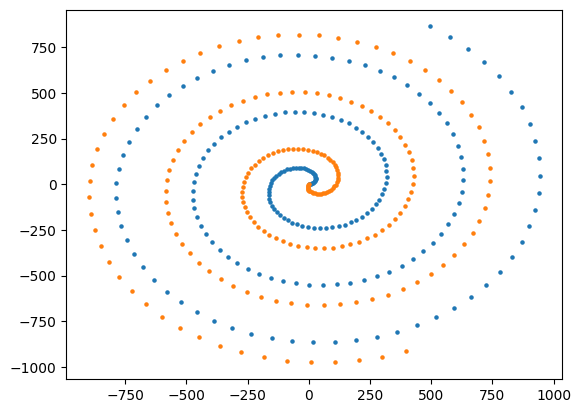

In [17]:
import matplotlib.pyplot as plt

a, b = data_1.T
plt.scatter(a, b, s=5)

aa, bb = data_2.T
plt.scatter(aa, bb, s=5)

plt.show()

In [18]:
df1 = pd.DataFrame(data=data_1, columns=["X", "Y"])
df1["CLASS"] = 0

df2 = pd.DataFrame(data=data_2, columns=["X", "Y"])
df2["CLASS"] = 1

df = df1.append(df2)
df['CLASS'].value_counts()

<ipython-input-18-e73ccc7fd10c>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)


0    200
1    200
Name: CLASS, dtype: int64

Now, build a neural network with Tensorflow to classify `df`. See how low data loss and how high accuracy can you achieve!

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
X = df.drop('CLASS', axis=1)
y = df['CLASS']

In [21]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [23]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [24]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
10/10 [==============================] - 1s 22ms/step - loss: 0.7025 - accuracy: 0.4938 - val_loss: 0.6999 - val_accuracy: 0.4250
Epoch 2/50
10/10 [==============================] - 0s 7ms/step - loss: 0.6935 - accuracy: 0.4844 - val_loss: 0.6960 - val_accuracy: 0.4500
Epoch 3/50
10/10 [==============================] - 0s 6ms/step - loss: 0.6873 - accuracy: 0.5156 - val_loss: 0.6968 - val_accuracy: 0.4500
Epoch 4/50
10/10 [==============================] - 0s 5ms/step - loss: 0.6862 - accuracy: 0.5219 - val_loss: 0.6969 - val_accuracy: 0.4875
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 0.6848 - accuracy: 0.5469 - val_loss: 0.6974 - val_accuracy: 0.4750
Epoch 6/50
10/10 [==============================] - 0s 5ms/step - loss: 0.6849 - accuracy: 0.5500 - val_loss: 0.6980 - val_accuracy: 0.4750
Epoch 7/50
10/10 [==============================] - 0s 7ms/step - loss: 0.6849 - accuracy: 0.5500 - val_loss: 0.7021 - val_accuracy: 0.4625
Epoch 8/50
10/10 [=

In [26]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.7046 - accuracy: 0.4875


In [27]:
test_loss

0.7045677900314331

In [28]:
test_accuracy

0.48750001192092896